## 1. Import Library

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.model_selection import cross_val_score

## 2. Load Dataset

### 2.1 Mengecek tipe encoding file

In [2]:
import chardet

rawdata = open('data/monroe county car crach 2003-2015.csv', 'rb').read()
result = chardet.detect(rawdata)
encoding = result['encoding']

print(f"Encoding file adalah: {encoding}")

Encoding file adalah: ISO-8859-1


### 2.2 Memanggil dataframe

In [3]:
data = pd.read_csv("data/monroe county car crach 2003-2015.csv", delimiter=',', encoding='ISO-8859-1')
data

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
...,...,...,...,...,...,...,...,...,...,...,...
53938,2003,10,6,Weekday,1700.0,2-Car,No injury/unknown,IMPROPER LANE USAGE,DUNN & WHITE LOT WEST,0.000000,0.000000
53939,2003,11,3,Weekday,800.0,1-Car,No injury/unknown,UNSAFE SPEED,RED OAK & SR446,0.000000,0.000000
53940,2003,12,5,Weekday,1200.0,2-Car,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,2ND ST & WALNUT,0.000000,0.000000
53941,2003,12,1,Weekend,700.0,2-Car,No injury/unknown,UNSAFE BACKING,NINETH & NORTH,0.000000,0.000000


### 2.3 Mengecek dimensi dari data struktur

In [4]:
data.shape

(53943, 11)

## 3. Data Understanding

Attribute  | Keterangan
------------- | -------------
Year | merepresentasikan tahun kejadian tabrakan
Month | merepresentasikan bulan kejadian tabrakan
Day | merepresentasikan hari kejadian tabrakan 
Weekend? | merepresentasikan apakah tabrakan terjadi di akhir pekan atau bukan
Hour | merepresentasikan jam kejadian tabrakan.       
Collision Type | merepresentasikan jenis tabrakan
Injury Type  | merepresentasikan jenis cedera
Primary Factor |merepresentasikan faktor utama penyebab tabrakan
Reported_Location |merepresentasikan lokasi kejadian tabrakan
Latitude |merepresentasikan garis lintang lokasi kejadian
Longitude |merepresentasikan garis bujur lokasi kejadian

### 3.1 Mengecek tipe data pada setiap atribut

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53875 non-null  object 
 4   Hour               53718 non-null  float64
 5   Collision Type     53937 non-null  object 
 6   Injury Type        53943 non-null  object 
 7   Primary Factor     52822 non-null  object 
 8   Reported_Location  53908 non-null  object 
 9   Latitude           53913 non-null  float64
 10  Longitude          53913 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.5+ MB


### 3.2 Mengecek deskripsi data pada dataframe

In [6]:
data.describe(include='object')

,Weekend?,Collision Type,Injury Type,Primary Factor,Reported_Location
count,53875,53937,53943,52822,53908
unique,2,7,4,55,19364
top,Weekday,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,E 3RD ST
freq,40604,37606,41603,11193,375


### 3.3 Mengecek duplikasi pada dataframe

In [7]:
data.duplicated().sum()

64

### 3.4 Mengecek missing value pada setiap atribut pada dataframe

In [8]:
data.isnull().sum()

Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1121
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64

### 3.5 Mengecek jumlah baris data dari setiap nilai unik

In [9]:
data['Year'].value_counts().sort_index(ascending=False)

Year
2015    4313
2014    4167
2013    4058
2012    4223
2011    3914
2010    4060
2009    4014
2008    4341
2007    4055
2006    3937
2005    3967
2004    4269
2003    4625
Name: count, dtype: int64

In [10]:
data['Month'].value_counts().sort_index(ascending=False)

Month
12    4598
11    4884
10    5581
9     4994
8     4480
7     3820
6     3752
5     4212
4     4574
3     3842
2     4541
1     4665
Name: count, dtype: int64

In [11]:
data['Day'].value_counts().sort_index(ascending=False)

Day
7    7364
6    9680
5    8122
4    7880
3    8133
2    7473
1    5291
Name: count, dtype: int64

In [12]:
data['Weekend?'].value_counts().sort_index(ascending=False)

Weekend?
Weekend    13271
Weekday    40604
Name: count, dtype: int64

In [13]:
data['Hour'].value_counts().sort_index(ascending=False)

Hour
2300.0    1187
2200.0    1503
2100.0    1794
2000.0    1918
1900.0    2442
1800.0    3232
1700.0    4631
1600.0    4488
1500.0    4283
1400.0    3750
1300.0    3526
1200.0    3819
1100.0    3040
1000.0    2360
900.0     2318
800.0     2247
700.0     2031
600.0      806
500.0      514
400.0      478
300.0      719
200.0      716
100.0      801
0.0       1115
Name: count, dtype: int64

In [14]:
data['Collision Type'].value_counts().sort_index

<bound method Series.sort_index of Collision Type
2-Car               37606
1-Car               10245
3+ Cars              3152
Moped/Motorcycle     1007
Bus                   850
Pedestrian            609
Cyclist               468
Name: count, dtype: int64>

In [15]:
data['Injury Type'].value_counts().sort_index

<bound method Series.sort_index of Injury Type
No injury/unknown     41603
Non-incapacitating    11136
Incapacitating         1089
Fatal                   115
Name: count, dtype: int64>

In [16]:
data['Primary Factor'].value_counts().sort_index

<bound method Series.sort_index of Primary Factor
FAILURE TO YIELD RIGHT OF WAY               11193
FOLLOWING TOO CLOSELY                        7359
OTHER (DRIVER) - EXPLAIN IN NARRATIVE        6158
UNSAFE BACKING                               5188
RAN OFF ROAD RIGHT                           2925
DISREGARD SIGNAL/REG SIGN                    2206
SPEED TOO FAST FOR WEATHER CONDITIONS        1921
IMPROPER TURNING                             1843
ANIMAL/OBJECT IN ROADWAY                     1688
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE     1656
UNSAFE SPEED                                 1499
ROADWAY SURFACE CONDITION                    1270
LEFT OF CENTER                               1078
IMPROPER LANE USAGE                           985
ALCOHOLIC BEVERAGES                           805
UNSAFE LANE MOVEMENT                          756
OVERCORRECTING/OVERSTEERING                   597
IMPROPER PASSING                              496
OTHER (VEHICLE) - EXPLAIN IN NARRATIVE        472


In [17]:
data['Reported_Location'].value_counts().sort_index

<bound method Series.sort_index of Reported_Location
E 3RD ST                         375
W 3RD ST                         222
SR37N & VERNAL                   197
3RD ST                           195
S WALNUT ST                      172
                                ... 
GARRISON CHAPEL RD & TRENDMAR      1
GOODNIGHT & S CLARIZZ BLVD         1
ADAIR & PLEASANT RIDGE RD          1
BRIGHTON CRST & SMITH              1
MONROW & THIRD ST                  1
Name: count, Length: 19364, dtype: int64>

In [18]:
data['Longitude'].value_counts().sort_index

<bound method Series.sort_index of Longitude
 0.000000     4908
-86.533600     867
-86.532400     525
-86.538592     358
-86.534784     332
              ... 
-86.562280       1
-86.509916       1
-86.518826       1
-86.562328       1
-86.368864       1
Name: count, Length: 16068, dtype: int64>

## 4. Visualisasi Data

### 4.1 Visualisasi distribusi setiap atribut

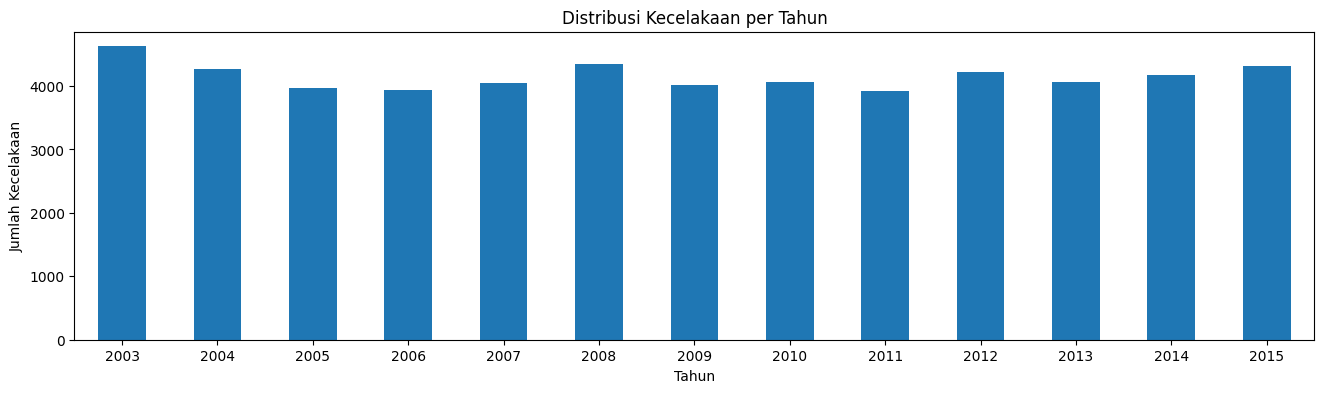

In [19]:
plt.figure(figsize=(16, 4))
data['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribusi Kecelakaan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kecelakaan')
plt.xticks(rotation=0)
plt.show()

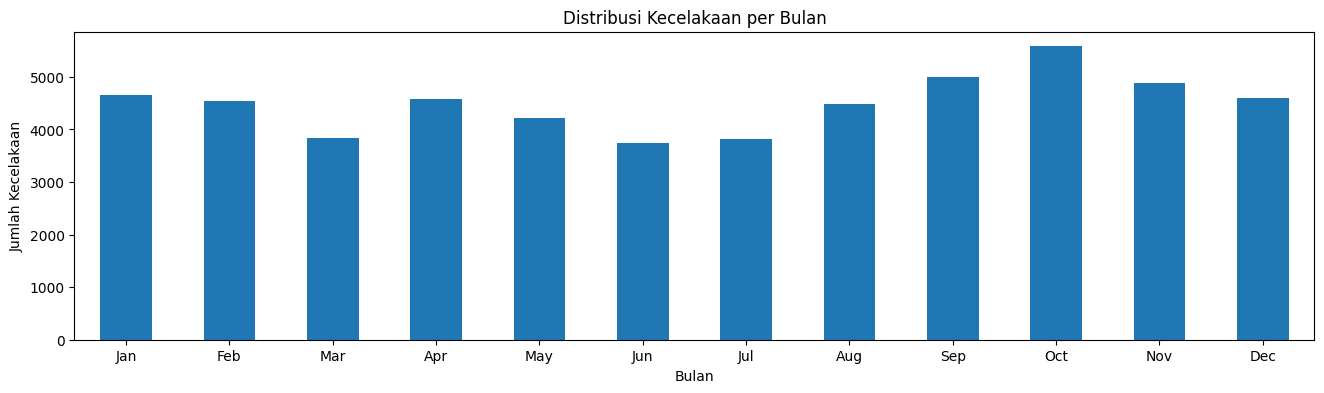

In [20]:
plt.figure(figsize=(16, 4))
months = data['Month'].value_counts().sort_index().index
data['Month'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribusi Kecelakaan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kecelakaan')
plt.xticks(range(0, 12), rotation=0, labels=[calendar.month_abbr[i] for i in range(1, 13)]) 
plt.show()


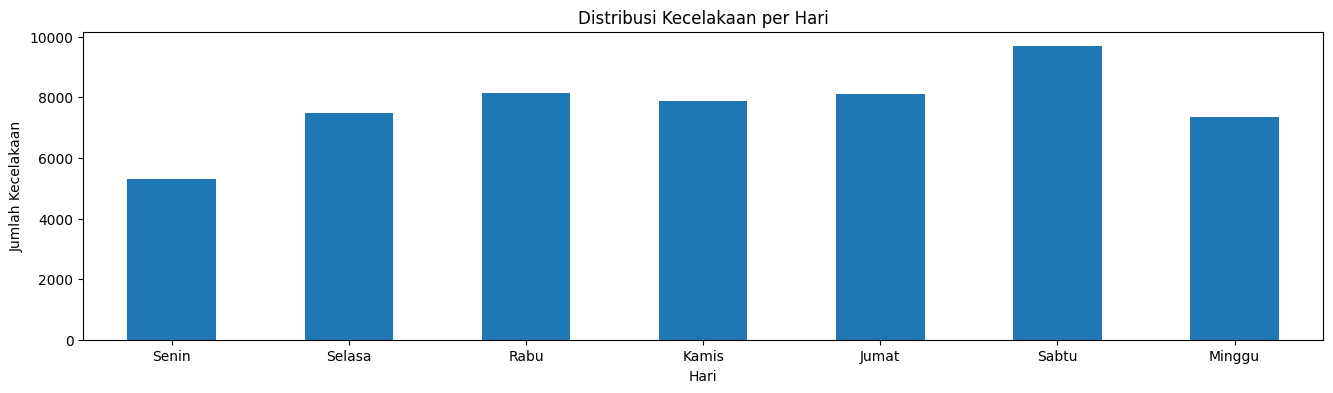

In [21]:
bahasa = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]

plt.figure(figsize=(16, 4))
days = data['Day'].value_counts().sort_index().index
data['Day'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribusi Kecelakaan per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Kecelakaan')
plt.xticks(range(0, 7), rotation=0, labels=bahasa) 
plt.show()


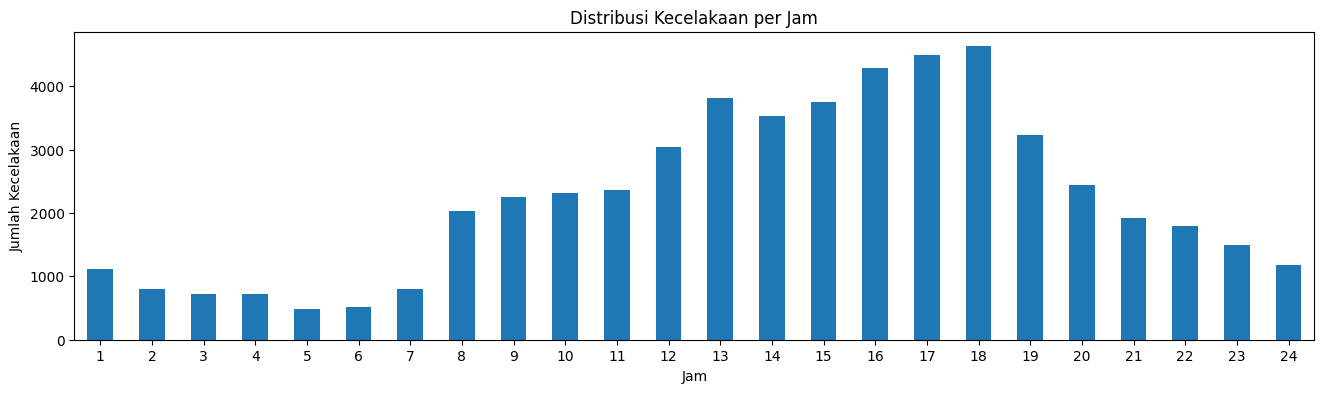

In [22]:
plt.figure(figsize=(16, 4))
hours = data['Hour'].value_counts().sort_index().index
data['Hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribusi Kecelakaan per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Kecelakaan')
plt.xticks(range(24), rotation=0, labels=[str(i) for i in range(1, 25)])
plt.show()


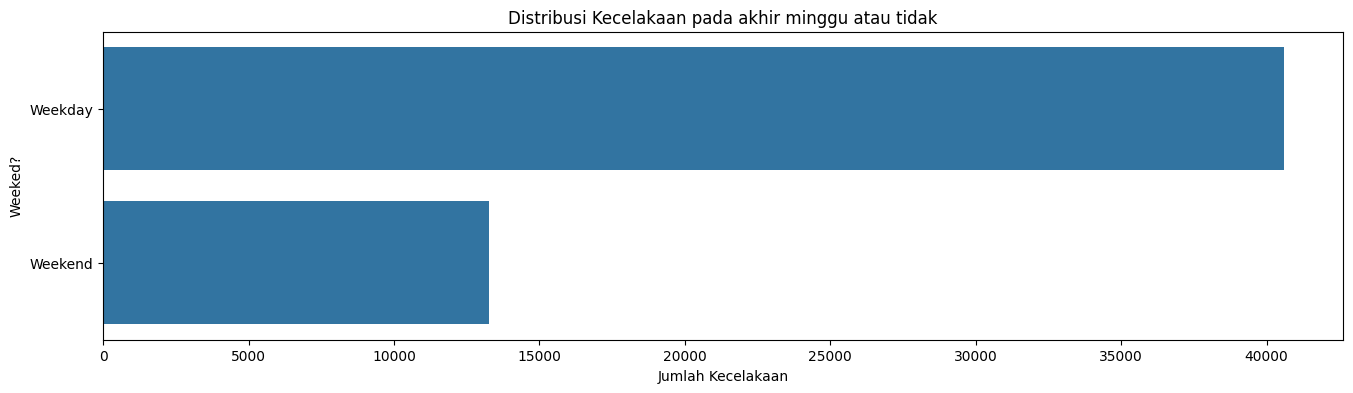

In [23]:
plt.figure(figsize=(16, 4))
sns.countplot(data['Weekend?'])
plt.title(f'Distribusi Kecelakaan pada akhir minggu atau tidak')
plt.xlabel('Jumlah Kecelakaan')
plt.ylabel('Weeked?')
plt.show()

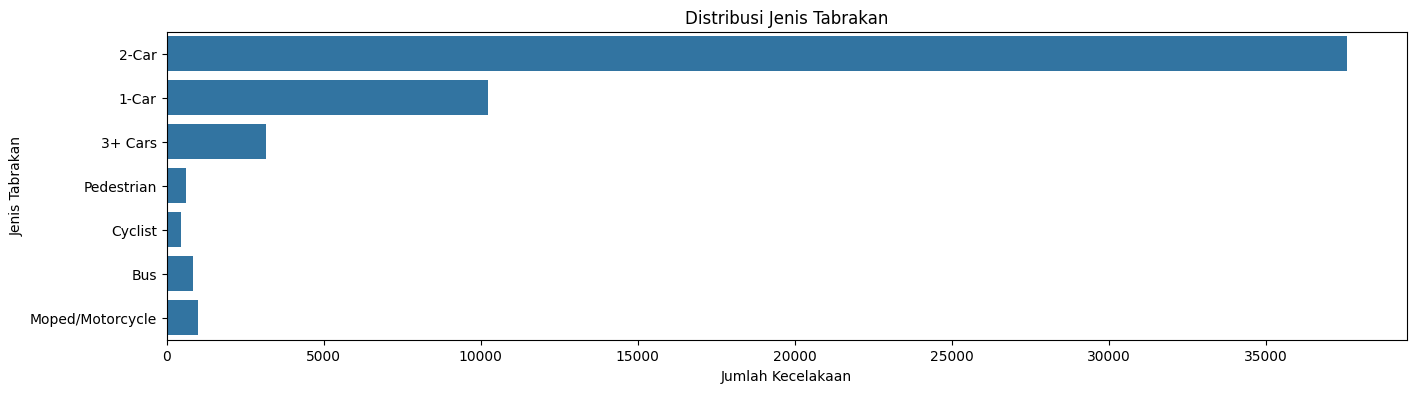

In [24]:
plt.figure(figsize=(16, 4))
sns.countplot(data['Collision Type'])
plt.title('Distribusi Jenis Tabrakan')
plt.xlabel('Jumlah Kecelakaan')
plt.ylabel('Jenis Tabrakan')
plt.show()


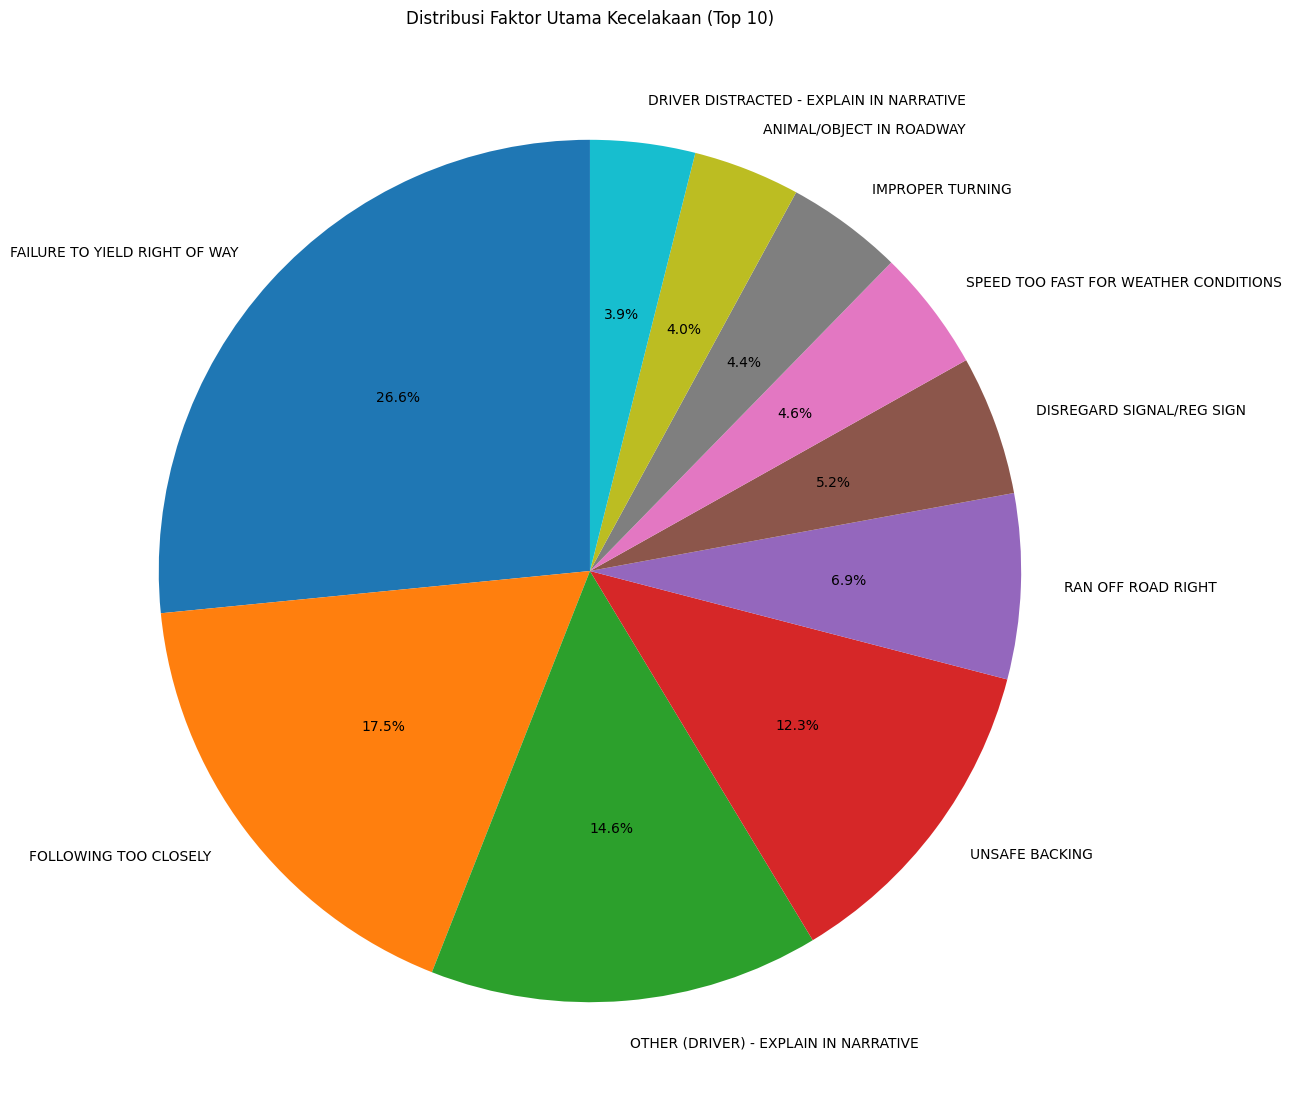

In [25]:
plt.figure(figsize=(14, 14))

value_counts = data['Primary Factor'].value_counts().head(10)
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Distribusi Faktor Utama Kecelakaan (Top 10)')
plt.ylabel('')

plt.show()


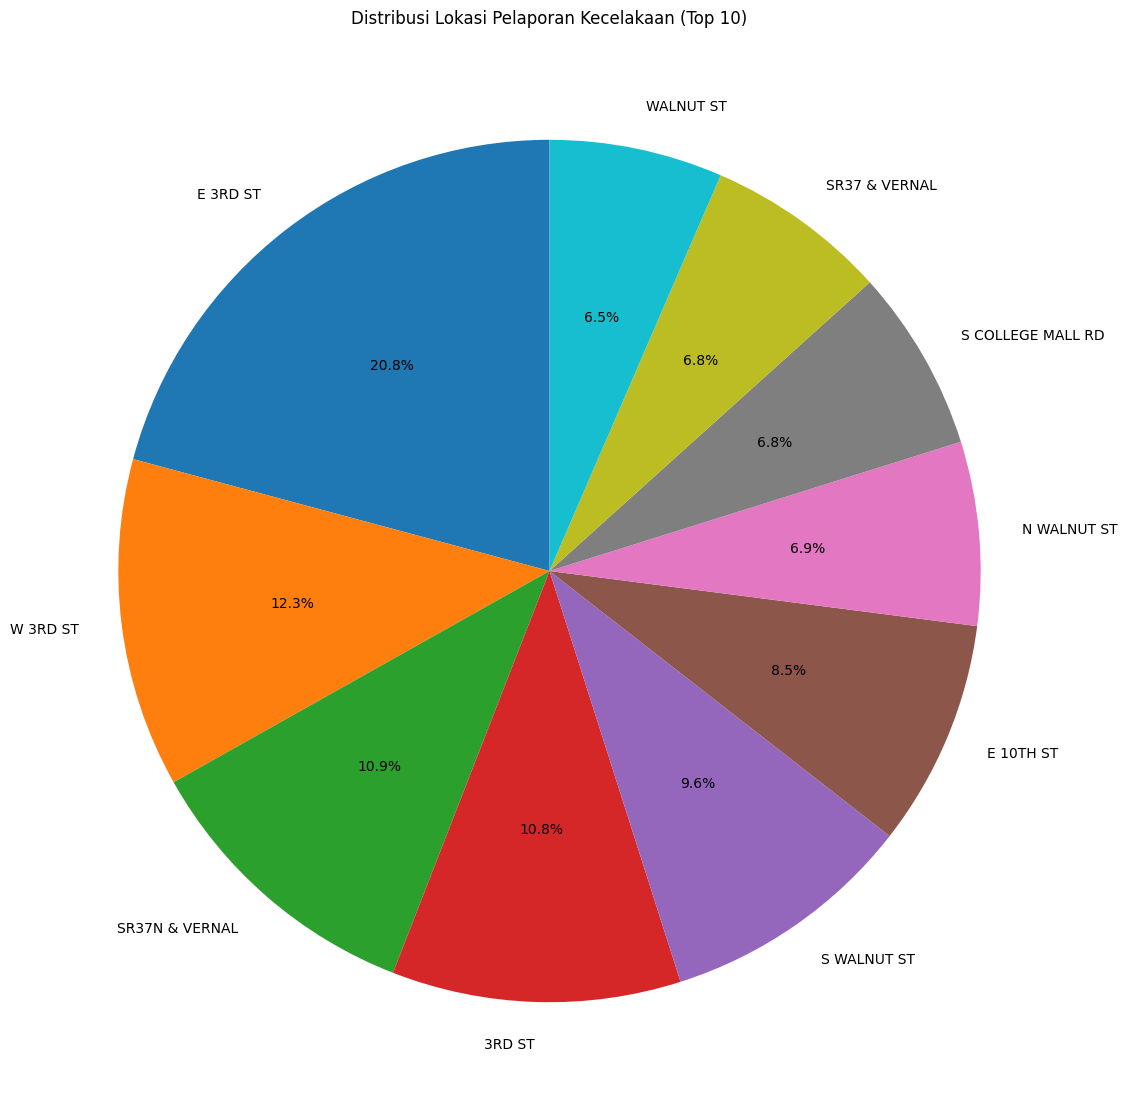

In [26]:
plt.figure(figsize=(14, 14))

value_counts = data['Reported_Location'].value_counts().head(10)
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Distribusi Lokasi Pelaporan Kecelakaan (Top 10)')
plt.ylabel('')

plt.show()

## 5. Data Preparation

### 5.1 Menghapus duplikasi

In [27]:
data.drop_duplicates(inplace=True)

### 5.2 Mengisi nilai missing value

In [28]:
column = ['Weekend?', 'Hour', 'Collision Type', 'Primary Factor', 'Reported_Location', 'Latitude', 'Longitude']

for nan in column:
    median = data[nan].mode()[0]
    data[nan].fillna(median, inplace=True)


In [29]:
data.isnull().sum()

Year                 0
Month                0
Day                  0
Weekend?             0
Hour                 0
Collision Type       0
Injury Type          0
Primary Factor       0
Reported_Location    0
Latitude             0
Longitude            0
dtype: int64

### 5.3 Melakukan Subset Data, Encoding dan Scaling

In [30]:
data_subset = data[['Hour', 'Collision Type', 'Injury Type', 'Primary Factor']]
data_subset = data_subset.sample(frac=0.6, random_state=42)

label_encoder = LabelEncoder()
data_encoded = data_subset.apply(label_encoder.fit_transform)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

## 6. Modeling

### 6.1 Algoritma yang digunakan

In [31]:
# Partitioning_Cluster (KMEANS Clustering)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
data_subset['Partitioning_Cluster'] = kmeans.fit_predict(data_scaled)

# Hierarchical Clustering (Agglomerative Clustering)
agg_cluster = AgglomerativeClustering(n_clusters=3)
data_subset['Hierarchical_Cluster'] = agg_cluster.fit_predict(data_scaled)

# Density-based Clustering (DBSCAN)
dbscan = DBSCAN(eps=0.5, min_samples=20)
data_subset['Density_Cluster'] = dbscan.fit_predict(data_scaled)

# Model-based Clustering (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=3, random_state=42)
data_subset['Model_Based_Cluster'] = gmm.fit_predict(data_scaled)

### 6.2 Hasil modeling

In [32]:
data_subset['Partitioning_Cluster'].value_counts()

Partitioning_Cluster
0    15831
2     9860
1     6636
Name: count, dtype: int64

In [33]:
data_subset['Hierarchical_Cluster'].value_counts()

Hierarchical_Cluster
0    18802
2     7708
1     5817
Name: count, dtype: int64

In [34]:
data_subset['Density_Cluster'].value_counts()

Density_Cluster
 2     18386
 0      4678
 1      3793
 3      1284
 4      1085
-1       822
 5       654
 7       361
 6       348
 12      217
 9       153
 10      106
 13       97
 8        89
 11       56
 14       54
 16       45
 18       26
 17       21
 15       21
 20       17
 19       14
Name: count, dtype: int64

In [35]:
data_subset['Model_Based_Cluster'].value_counts()

Model_Based_Cluster
0    24669
1     6723
2      935
Name: count, dtype: int64

### 6.3 Visualisasi hasil modeling

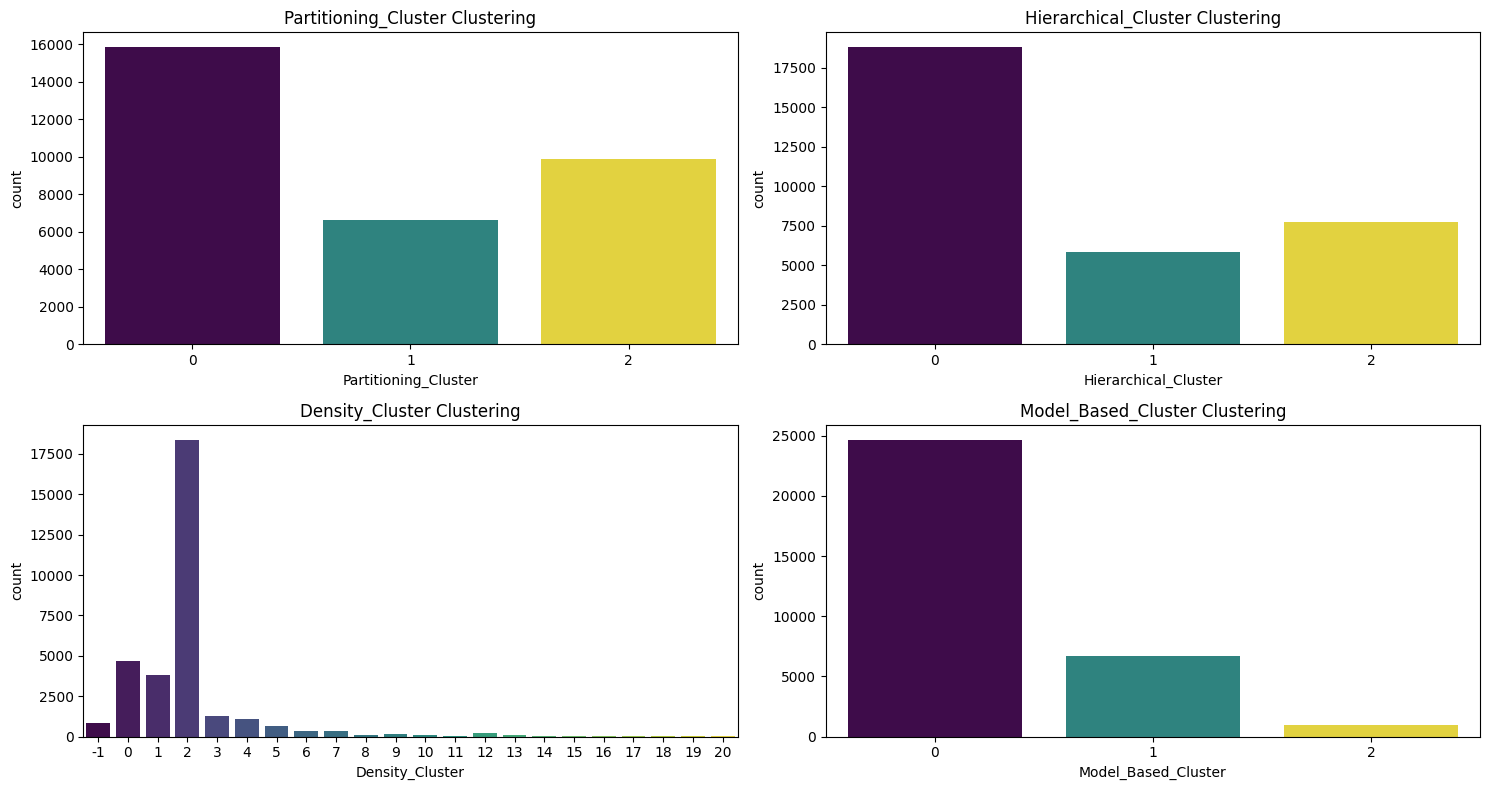

In [36]:
cluster_columns = ['Partitioning_Cluster', 'Hierarchical_Cluster', 'Density_Cluster', 'Model_Based_Cluster']

plt.figure(figsize=(15, 8))
for i, column in enumerate(cluster_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data_subset, x=column, hue=column, palette='viridis', legend=False)
    plt.title(f'{column} Clustering')

plt.tight_layout()
plt.show()

6.4 Metrik Evaluasi

In [37]:
# Fit and predict clusters
data_subset['Partitioning_Cluster'] = kmeans.fit_predict(data_scaled)
data_subset['Hierarchical_Cluster'] = agg_cluster.fit_predict(data_scaled)
data_subset['Density_Cluster'] = dbscan.fit_predict(data_scaled)
data_subset['Model_Based_Cluster'] = gmm.fit_predict(data_scaled)

# Calculate Silhouette Score
silhouette_scores = {
    'KMeans': silhouette_score(data_scaled, data_subset['Partitioning_Cluster']),
    'Agg_Cluster': silhouette_score(data_scaled, data_subset['Hierarchical_Cluster']),
    'DBSCAN': silhouette_score(data_scaled, data_subset['Density_Cluster']),
    'GMM': silhouette_score(data_scaled, data_subset['Model_Based_Cluster'])
}

# Calculate Calinski-Harabasz Index
calinski_harabasz_scores = {
    'KMeans': calinski_harabasz_score(data_scaled, data_subset['Partitioning_Cluster']),
    'Agg_Cluster': calinski_harabasz_score(data_scaled, data_subset['Hierarchical_Cluster']),
    'DBSCAN': calinski_harabasz_score(data_scaled, data_subset['Density_Cluster']),
    'GMM': calinski_harabasz_score(data_scaled, data_subset['Model_Based_Cluster'])
}

# Display the results
print("Silhouette Scores:")
for algorithm, score in silhouette_scores.items():
    print(f"{algorithm}: {score:.4f}")

print("\nCalinski-Harabasz Scores:")
for algorithm, score in calinski_harabasz_scores.items():
    print(f"{algorithm}: {score:.4f}")


Silhouette Scores:
KMeans: 0.3300
Agg_Cluster: 0.3138
DBSCAN: 0.0982
GMM: 0.3733

Calinski-Harabasz Scores:
KMeans: 10734.5449
Agg_Cluster: 8588.1148
DBSCAN: 1358.9695
GMM: 6163.6951


## Tunning Model

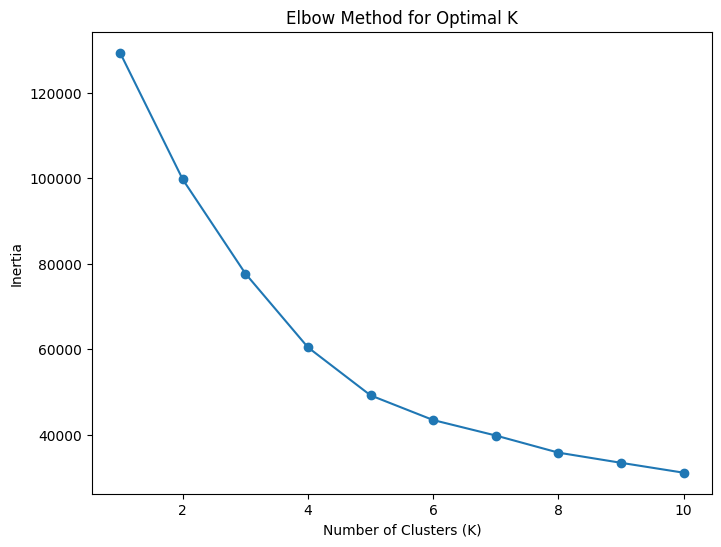

In [38]:
inertia_values = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Partitioning_Cluster (KMEANS Clustering)
TM_kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
data_subset['TM_Partitioning_Cluster'] = TM_kmeans.fit_predict(data_scaled)

# Hierarchical Clustering (Agglomerative Clustering)
TM_agg_cluster = AgglomerativeClustering(n_clusters=4)
data_subset['TM_Hierarchical_Cluster'] = TM_agg_cluster.fit_predict(data_scaled)

# Density-based Clustering (DBSCAN)
TM_dbscan = DBSCAN(eps=0.5, min_samples=61)
data_subset['TM_Density_Cluster'] = TM_dbscan.fit_predict(data_scaled)

# Model-based Clustering (Gaussian Mixture Model)
TM_gmm = GaussianMixture(n_components=4, random_state=42)
data_subset['TM_Model_Based_Cluster'] = TM_gmm.fit_predict(data_scaled)

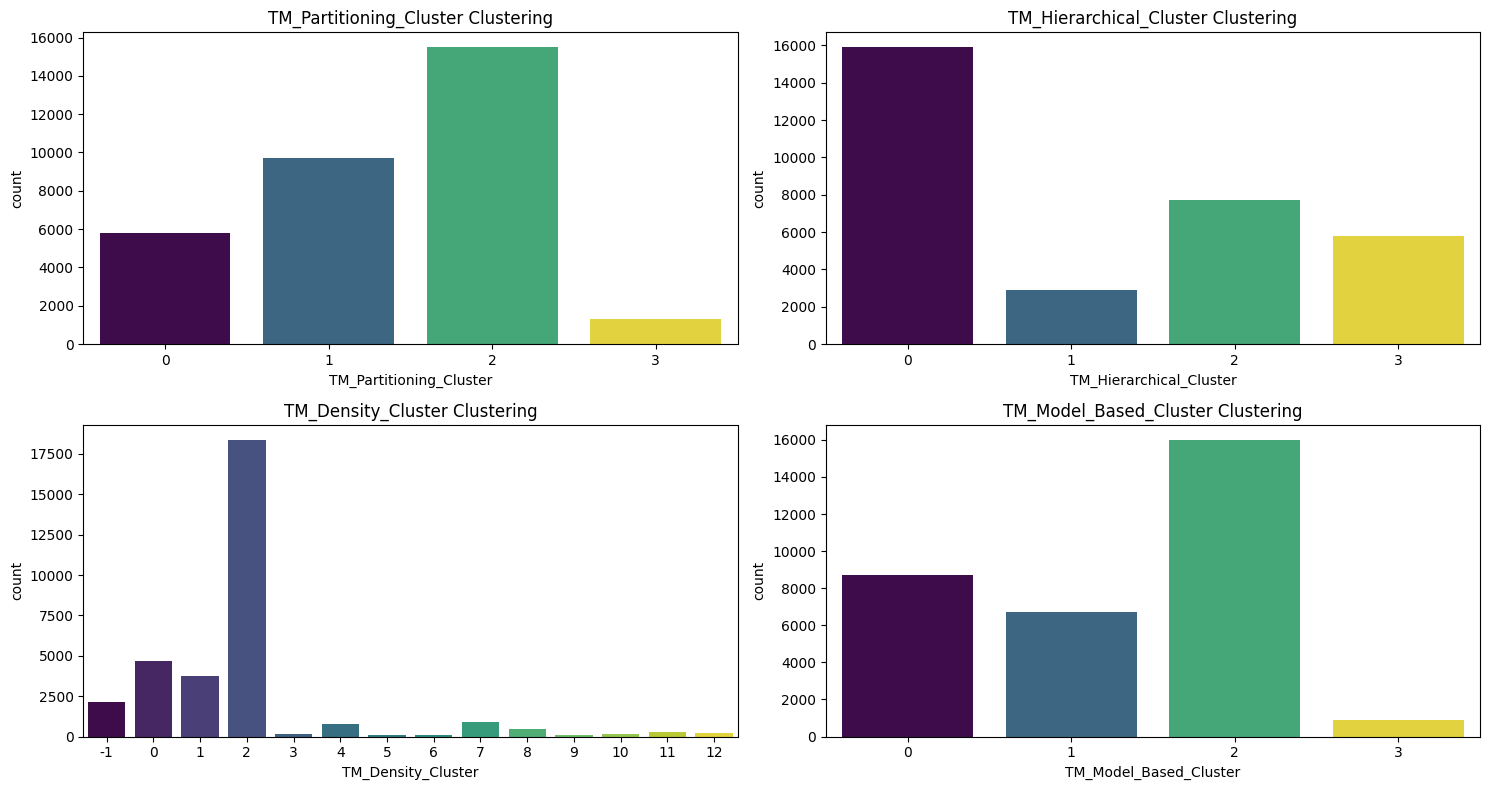

In [ ]:
cluster_columns = ['TM_Partitioning_Cluster', 'TM_Hierarchical_Cluster', 'TM_Density_Cluster', 'TM_Model_Based_Cluster']

plt.figure(figsize=(15, 8))
for i, column in enumerate(cluster_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data_subset, x=column, hue=column, palette='viridis', legend=False)
    plt.title(f'{column} Clustering')

plt.tight_layout()
plt.show()

In [ ]:
# Fit and predict clusters
data_subset['TM_Partitioning_Cluster'] = TM_kmeans.fit_predict(data_scaled)
data_subset['TM_Hierarchical_Cluster'] = TM_agg_cluster.fit_predict(data_scaled)
data_subset['TM_Density_Cluster'] = TM_dbscan.fit_predict(data_scaled)
data_subset['TM_Model_Based_Cluster'] = TM_gmm.fit_predict(data_scaled)

# Calculate Silhouette Score
TM_silhouette_scores = {
    'KMeans': silhouette_score(data_scaled, data_subset['TM_Partitioning_Cluster']),
    'Agg_Cluster': silhouette_score(data_scaled, data_subset['TM_Hierarchical_Cluster']),
    'DBSCAN': silhouette_score(data_scaled, data_subset['TM_Density_Cluster']),
    'GMM': silhouette_score(data_scaled, data_subset['TM_Model_Based_Cluster'])
}

# Calculate Calinski-Harabasz Index
TM_calinski_harabasz_scores = {
    'KMeans': calinski_harabasz_score(data_scaled, data_subset['TM_Partitioning_Cluster']),
    'Agg_Cluster': calinski_harabasz_score(data_scaled, data_subset['TM_Hierarchical_Cluster']),
    'DBSCAN': calinski_harabasz_score(data_scaled, data_subset['TM_Density_Cluster']),
    'GMM': calinski_harabasz_score(data_scaled, data_subset['TM_Model_Based_Cluster'])
}

# Display the results
print("Silhouette Scores:")
for algorithm, score in TM_silhouette_scores.items():
    print(f"{algorithm}: {score:.4f}")

print("\nCalinski-Harabasz Scores:")
for algorithm, score in TM_calinski_harabasz_scores.items():
    print(f"{algorithm}: {score:.4f}")


Silhouette Scores:
KMeans: 0.3678
Agg_Cluster: 0.3466
DBSCAN: -0.0098
GMM: 0.1703

Calinski-Harabasz Scores:
KMeans: 12279.9552
Agg_Cluster: 10412.6208
DBSCAN: 1748.3494
GMM: 5843.0367
